## Load in

In [1]:
import pandas as pd
import numpy as np
from ast import literal_eval
#from hdbscan import HDBSCAN
from sklearn.manifold import TSNE
from utils import get_selection_cut_histograms_and_power
import matplotlib.pyplot as plt
import matplotlib
from ast import literal_eval

In [2]:
def list_conv(string): return np.fromstring(string[1:-1], dtype=float, sep=' ')

In [3]:
df = pd.read_csv("df_with_final_MST_drop_scores.csv", converters={"paper_titles": literal_eval, "sub_lattice_structure": literal_eval, "drop_values": list_conv}, index_col="material_id")
df = df.drop(["sub_lattice_structure", "flat", "Cluster_ID", "cluster_size", "dbcv_cluster", "probabilities", "paper_titles", "arr_drop_values", "drop_values"], axis=1)
df_fingerprint = pd.read_csv("df_fingerprint.csv", index_col="material_id")

/tmp/ipykernel_80/2827156843.py:1: DeprecationWarning: string or file could not be read to its end due to unmatched data; this will raise a ValueError in the future.
  def list_conv(string): return np.fromstring(string[1:-1], dtype=float, sep=' ')


In [4]:
df = pd.merge(df, df_fingerprint, left_index=True, right_index=True, how='inner')
print(df.columns[:14])
fingerprint_cols = [col for col in df.columns if "structure_fingerprint" in col]

Index(['flat_segments', 'formula', 'synth_score', 'sublattice_element',
       'experimentally_observed', 'band_gap', 'synth_score_2',
       'matched_to_a_sc', 'SC_doped_from_original', 'average_drop', 'max_drop',
       'min_drop', 'w_av_drop', 'structure_fingerprint_0'],
      dtype='object')


In [5]:
# Keep every other row starting from the first row
df_unique = df.iloc[::2]
print(len(df_unique.index))
print(len(np.unique(df_unique.index)))


24828
24828


In [6]:
converters = {col:literal_eval for col in
              ['rcsr_name', 'icsd_id', 'systre_key', 'systre_spacegroup', 'spacegroup', 'spacegroup_number', 'fb_lattice_dimensionality', 'fb_lattice_ids']}

In [7]:
df_sublattices = pd.read_csv("mit_info.csv", index_col="material_id", converters=converters)
# df_sublattices.rename(columns={'MP ID': "material_id", "FB Sublattice": "sublattice_element"}, inplace=True)
# df_sublattices.set_index("material_id", inplace=True)
#df_sublattices.head()
print(len(df_sublattices.index))
print(len(np.unique(df_sublattices.index)))

82011
63144


In [8]:
df_merged = df_unique.merge(df_sublattices, how="left", left_on=[df_unique.index, "sublattice_element"], right_on=[df_sublattices.index, "sublattice_element"])
# merged_df = merged_df[merged_df['sublattice_element_df1'] == merged_df['sublattice_element_df2']]
df_merged.rename(columns={"key_0":"material_id"}, inplace=True)
df_merged.set_index("material_id", inplace=True)
print(len(df_merged[~df_merged.rcsr_name.isna()].index))
print(len(np.unique(df_merged[~df_merged.rcsr_name.isna()].index)))
df_merged
print(len(np.unique(df_merged.index)))

8007
8007
24828


In [16]:
df_merged

,flat_segments,formula,synth_score,sublattice_element,experimentally_observed,band_gap,synth_score_2,matched_to_a_sc,SC_doped_from_original,average_drop,...,point_group,rcsr_name,icsd_id,systre_key,systre_spacegroup,mit_sublattice_spacegroup_numbers,fb_lattice_dimensionality,fb_lattice_ids,mit_sublattice_spacegroups,curated
material_id,,,,,,,,,,,,,,,,,,,,,
mp-1001024,[4],Y2MgS4,0.380295,S,False,1.7768,0.984559,False,NaN,0.782143,...,m-3m,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mp-1001079,[3],Li(CN)2,0.534360,N,False,1.6458,0.490698,False,NaN,0.967626,...,2/m,[[None]],[-1],[[NN_COLLISION]],[[None]],[12],[[1]],[[LI-5]],"[[""C2/m""]]",False
mp-1001080,[4],H2CO3,0.812061,O,False,5.6848,0.749909,False,NaN,0.898362,...,mmm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mp-1001112,"[3, 4]",Na2H3CO6,0.629955,O,False,3.5954,0.762945,False,NaN,0.904252,...,mmm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mp-1003315,"[1, 2, 3]",LiMn4O8,0.834009,Mn,False,0.1380,0.161159,False,NaN,0.974984,...,2/m,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mp-998917,[3],K2O2,0.022630,O,False,2.0834,0.432028,False,NaN,0.915889,...,-6m2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mp-998929,"[3, 4]",K2O,0.242943,O,False,1.8534,0.017624,False,NaN,0.157528,...,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mp-999290,[3],PuCoC2,0.438483,Pu,True,0.0000,0.977292,False,NaN,0.980007,...,mm2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
def has_lattice_by_code(rcsr_name_list, code):
    array = np.array(rcsr_name_list, dtype="object")
    #print(array)
    for row in array:
        if code in row:
            return True
    return False
def has_non_NONE_name(rcsr_name_list):
    # keep all entries with at least one valid sublattice code
    array = np.array(rcsr_name_list, dtype="object")
    #print(array)
    return ((array != "None")).any()
def number_by_lattice_code(df, code_name):
    df_slice = df[df.fb_lattice_ids.apply(has_lattice_by_code, args=(code_name,))]
    return len(df_slice.index)

In [10]:
d_val = 0.6944 # determined by intersection of lower/upper section fits to drop scores

#df_kgm = df_merged[df_merged.rcsr_name.apply(has_lattice_by_code, args=("kgm",))]

# df_kgm_cut = df_kgm[df_kgm["average_drop"]<=d_val]
df_merged_cut = df_merged[df_merged["average_drop"]<=d_val]
print("number candidates remaining after cut = {0}".format(len(df_merged_cut.index)))

# print(len(df_kgm.index) / len(df_merged.index)*100)
# print(len(df_kgm_cut.index) / len(df_merged_cut.index)*100)

#df_kgm_cut.head(20)

number candidates remaining after cut = 1773


In [11]:
df_codes_matched_TB = df_merged[df_merged["rcsr_name"].notna()]
print("number of entries MIT also found as flat-band via TBM = {0}".format(len(df_codes_matched_TB.index)))
df_codes = df_codes_matched_TB[df_codes_matched_TB.rcsr_name.apply(has_non_NONE_name)] # take only classifiable entries

print("number of those sublattice structures which could be classified = {0}".format(len(df_codes.index)))
df_codes_matched_TB_cut = df_codes_matched_TB[df_codes_matched_TB["average_drop"]<=d_val]
df_codes_cut = df_codes[df_codes["average_drop"]<=d_val]
print("after cut; entries MIT also found as flat-band via TBM = {0}".format(len(df_codes_matched_TB_cut.index)))
print("after cut; number of those sublattice structures which could be classified = {0}".format(len(df_codes_cut.index)))


number of entries MIT also found as flat-band via TBM = 8007
number of those sublattice structures which could be classified = 1855
after cut; entries MIT also found as flat-band via TBM = 544
after cut; number of those sublattice structures which could be classified = 169


In [12]:
# Function to plot the pie chart
def plot_sublattice_distribution(df):
    percentages = {}
    other_percentage = 100

    # Calculate percentages for lattice types in the dictionary
    for code, lattice_name in code_to_names.items():
        percentage = percent_of_candidates(df, code)
        if percentage > 0:  # Only include lattice types with non-zero percentage
            percentages[lattice_name] = percentage
            other_percentage -= percentage

    # Add "other" percentage
    if other_percentage > 0:
        percentages["Other"] = other_percentage

    # Plot the pie chart with professional-looking settings
    fig, ax = plt.subplots(figsize=(10, 6), subplot_kw=dict(aspect="equal"))
    
    def my_autopct(pct):
        return '{:.1f}%'.format(pct)
    
    wedges, texts, autotexts = ax.pie(
        percentages.values(),
        labels=percentages.keys(),
        autopct=my_autopct,
        startangle=90,
        colors=plt.cm.Set2.colors,  # Color scheme
        wedgeprops=dict(width=0.28, edgecolor="black"),  # Width of the pie slices
        textprops=dict(color="black"),  # Color of percentage labels
    )

    #ax.legend(wedges, percentages.keys(), loc='upper left', bbox_to_anchor=(1, 1))  # Add legend
    plt.setp(autotexts, size=10, weight="bold")  # Font size and weight for percentage labels
    #ax.set_title("Percentage Distribution of Sublattice Types", fontsize=16, fontweight='bold')  # Title

        
    plt.savefig("0.6944_sublattice_piechart.png", dpi=500)
    plt.show()

In [13]:
#print(np.unique(df_codes_cut.fb_lattice_ids.to_numpy()))
from collections import Counter


data = df_codes_cut.fb_lattice_ids.to_numpy()
# Flatten the array
flat_data = [item for sublist in data for sublist2 in sublist for item in sublist2]

# Count occurrences of each string
string_counts = Counter(flat_data)

# Find the most frequent strings
most_common_strings = string_counts.most_common()

print("Most frequent strings:")
for string, count in most_common_strings:
    print(f"{string}: {count} occurrences")

Most frequent strings:
SK-1: 80 occurrences
SK-3: 27 occurrences
SK-38: 20 occurrences
SK-34: 20 occurrences
SK-13: 20 occurrences
SK-8: 12 occurrences
LI-2: 12 occurrences
SK-2: 10 occurrences
SK-15: 7 occurrences
SK-33: 7 occurrences
LI-1: 6 occurrences
LI-173: 6 occurrences
SK-16: 6 occurrences
SK-61: 5 occurrences
SK-190: 5 occurrences
SK-17: 4 occurrences
SK-181: 4 occurrences
SK-119: 4 occurrences
SK-149: 4 occurrences
SK-873: 4 occurrences
SK-76: 3 occurrences
SK-320: 3 occurrences
SK-143: 3 occurrences
SK-29: 3 occurrences
LI-30: 2 occurrences
LI-17: 2 occurrences
LI-38: 2 occurrences
SK-1938: 2 occurrences
SK-250: 2 occurrences
LI-27: 2 occurrences
SK-70: 2 occurrences
LI-12: 2 occurrences
LI-82: 2 occurrences
SK-872: 2 occurrences
LI-5: 2 occurrences
SK-3139: 2 occurrences
LI-15: 2 occurrences
LI-929: 2 occurrences
LI-3588: 2 occurrences
LI-2172: 2 occurrences
LI-231: 2 occurrences
LI-96: 2 occurrences
SK-146: 2 occurrences
LI-3: 2 occurrences
LI-184: 2 occurrences
LI-98: 2 o

In [1]:
#df_codes_cut.head()
print(df_codes_cut[df_codes_matched_TB_cut["fb_lattice_ids"]=="SK-12"])
#code_to_names([[], []])

# Define the dictionary code_to_names
code_to_names = {
    "SK-9": "Dice", "SK-1": "Kagome", "SK-2": "Stub chain", "LI-2": "Tetragonal Chain", "LI-1": "Diamond Chain", 
    "SK-3": "Pyrochlore", "SK-4": "Lieb", "SK-8": "Star", 
    "SK-38": "Triangular Dipyramidal", "SK-13": "TCK", "SK-12": "Square-octagonal"
}

# Function to print the desired output
def percent_of_candidates(df, code):
    lattice_name = code_to_names.get(code, "Unknown Lattice")
    percentage = (number_by_lattice_code(df, code) / len(df.index))*100
    #print("% of candidates with {} lattice = {}".format(lattice_name, percentage))
    return percentage
# Example usage
#print_number_of_candidates(df_codes_cut, "LI-2")
plot_sublattice_distribution(df_codes_cut)

NameError: name 'df_codes_cut' is not defined

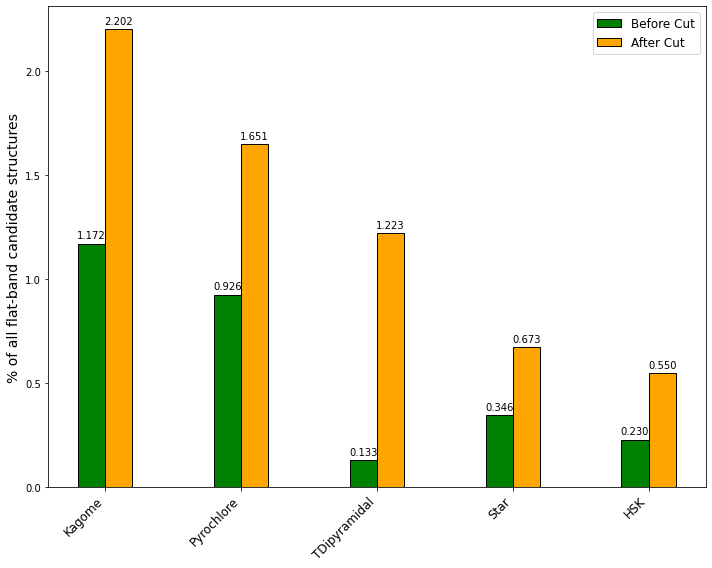

In [53]:
def factor_increase_from_cut(df, df_cut, codes, names):
    n_codes = len(codes)
    width = 0.2
    fig, ax = plt.subplots(figsize=(10, 8))

    ind = np.arange(n_codes)
    before_values = [number_by_lattice_code(df, code) / len(df_merged.index) * 100 for code in codes]
    after_values = [number_by_lattice_code(df_cut, code) / 1635 * 100 for code in codes]

    rects1 = ax.bar(ind - width/2, before_values, width, color='green', edgecolor='black', linewidth=1, label='Before Cut')
    rects2 = ax.bar(ind + width/2, after_values, width, color='orange', edgecolor='black', linewidth=1, label='After Cut')

    #ax.set_xlabel('Codes', fontsize=14)
    ax.set_ylabel('% of all flat-band candidate structures', fontsize=14)
    #ax.set_title('Factor Increase Before and After Cut', fontsize=16)
    ax.set_xticks(ind)
    ax.set_xticklabels(codes)

    # Diagonal labels for codes
    ax.set_xticklabels(names, rotation=45, ha='right', fontsize=12)

    ax.legend(fontsize=12)

    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            ax.annotate(f'{height:.3f}',  # rounded to 3 decimal places
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),
                        textcoords="offset points",
                        ha='center', va='bottom', fontsize=10)

    autolabel(rects1)
    autolabel(rects2)

    plt.tight_layout()
    plt.savefig("Increases_bar_chart.png")
    plt.show()

# Example usage
codes_to_plot = ["SK-1", "SK-3", "SK-38", "SK-8", "SK-13"]
names = ["Kagome", "Pyrochlore", "TDipyramidal", "Star", "HSK"]
factor_increase_from_cut(df_codes_matched_TB, df_codes_matched_TB_cut, codes_to_plot, names)


#1.173
#2.202

In [25]:
print(len(df_merged_cut))

1773


# Get sliced dataframes to get material ids with each sublattice type

In [15]:
df_slice = df_codes_cut[df_codes_cut.fb_lattice_ids.apply(has_lattice_by_code, args=("LI-1",))]
df_slice.head(20)

,flat_segments,formula,synth_score,sublattice_element,experimentally_observed,band_gap,synth_score_2,matched_to_a_sc,SC_doped_from_original,average_drop,...,point_group,rcsr_name,icsd_id,systre_key,systre_spacegroup,mit_sublattice_spacegroup_numbers,fb_lattice_dimensionality,fb_lattice_ids,mit_sublattice_spacegroups,curated
material_id,,,,,,,,,,,,,,,,,,,,,
mp-1191079,"[3, 4]",Ti7P4,0.059884,Ti,True,0.0000,0.994675,False,NaN,0.260734,...,2/m,"[[None, None, None], [None, None], [None]]","[648209, 648209, 648209]","[[NN_COLLISION, NN_COLLISION, NN_COLLISION], [...","[[None, None, None], [None, None], [None]]","[12, 12, 12]","[[1, 1, 1], [1, 1], [3]]","[[LI-1, LI-1, LI-1], [LI-1, LI-961], [LI-14306]]","[[""C2/m""], [""C2/m""], [""C2/m""]]",False
mp-639662,"[3, 4]",CrF5,0.226831,F,True,1.2206,0.999984,False,NaN,0.384377,...,mmm,"[[None, None], [None, None], [None]]","[419661, 419661, 419661]","[[NN_COLLISION, NN_COLLISION], [NN_COLLISION, ...","[[None, None], [None, None], [p2mg]]","[57, 57, 57]","[[1, 1], [1, 1], [2]]","[[LI-1, LI-1], [LI-96, LI-96], [SK-10076]]","[[""Pbcm""], [""Pbcm""], [""Pbcm""]]",False


# View Locations of Lattice Types on t-SNE Plot for Figure Creations

In [16]:
CUT_COLUMN = "average_drop"
CUT_VALUE = 0.6944
def safe_load(x):
    try:
        return literal_eval(x)
    except:
        return np.nan
    
def safe_has_lattice_by_code(x, lattice_type):
    try:
        return has_lattice_by_code(x, lattice_type)
    except:
        return False
df_cut = pd.read_csv(f"df_cut_{CUT_COLUMN}={CUT_VALUE}_MS7_MC6_PERPLXTY40.csv", index_col="material_id", converters={"fb_lattice_ids": safe_load})

In [35]:
def plot_lattice_type(lattice_type, df=df_cut, ax=None):
    df = df.copy()
    mask = df.fb_lattice_ids.apply(safe_has_lattice_by_code, args=(lattice_type,))
    df_type = df[mask]
    df_non_type = df[~mask]
    
    if not ax:
        fig, ax = plt.subplots(figsize=(8,8))
        ax.scatter(df_non_type.fx, df_non_type.fy,s=0.5, c="black")
        
    ax.scatter(df_type.fx, df_type.fy,s=5, label=code_to_names[lattice_type])
    
    return ax

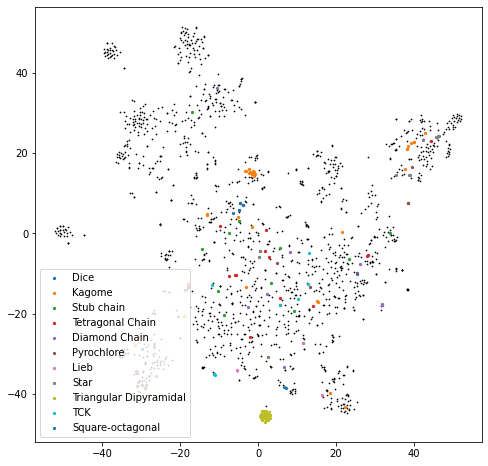

In [36]:
ax = None
for code in code_to_names.keys():
    ax = plot_lattice_type(code, ax=ax)

ax.legend()

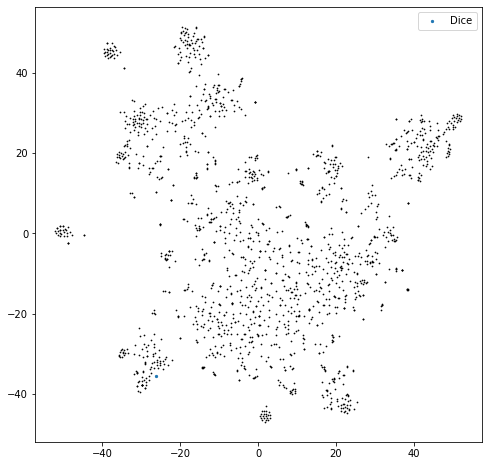

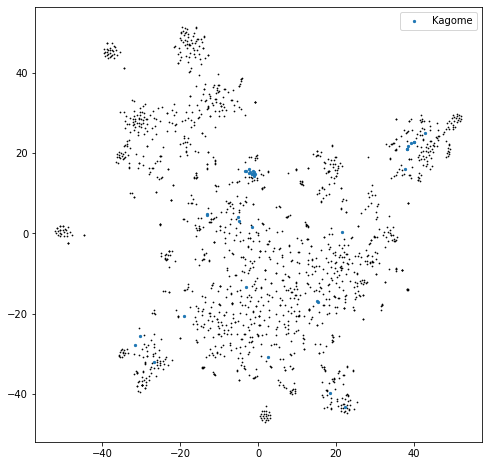

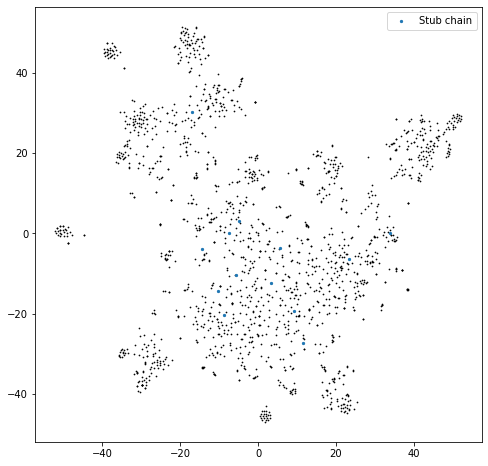

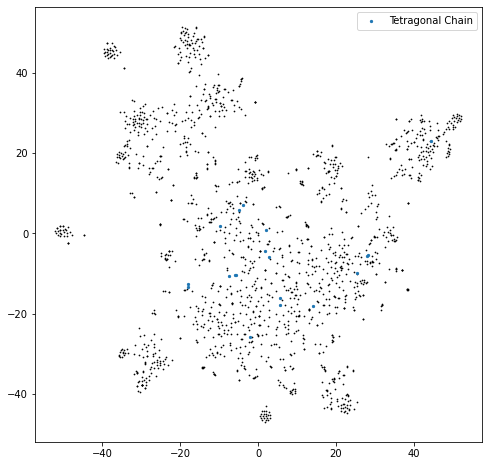

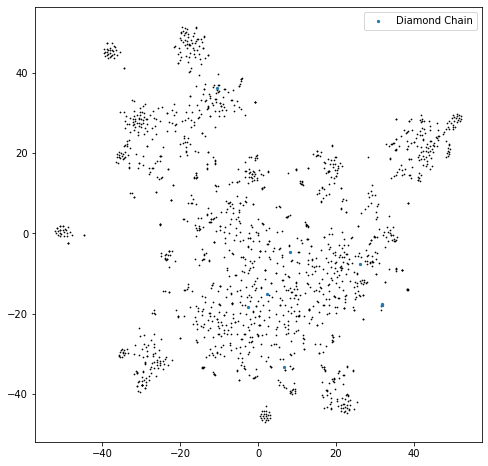

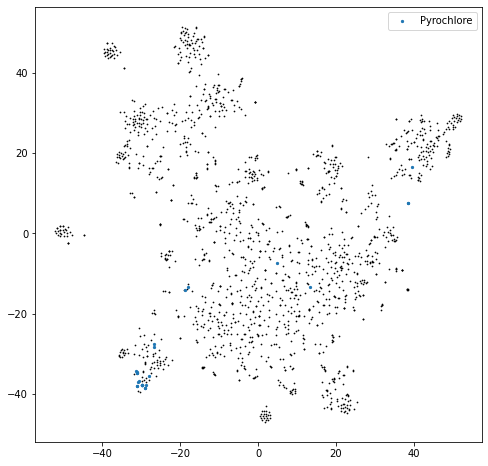

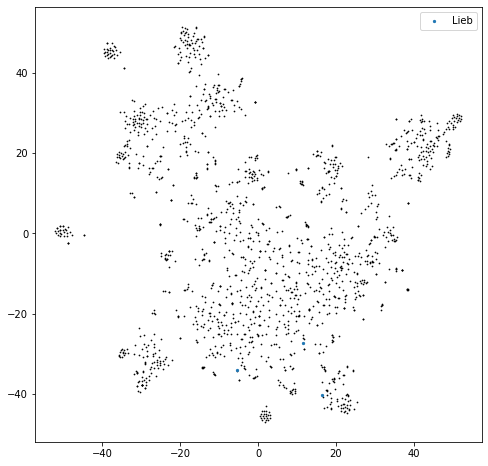

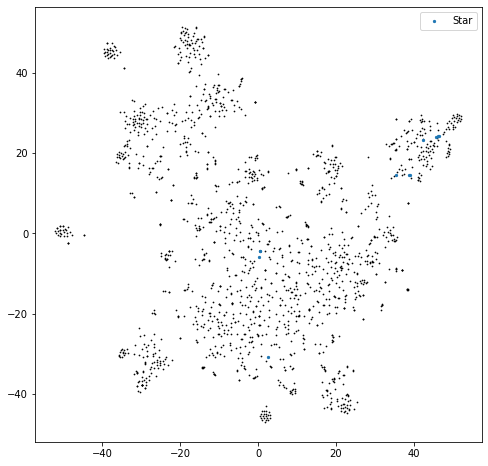

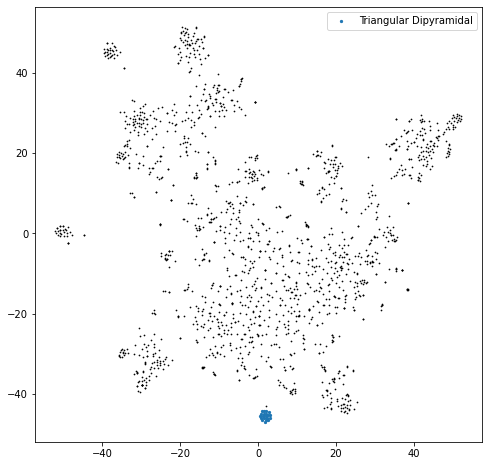

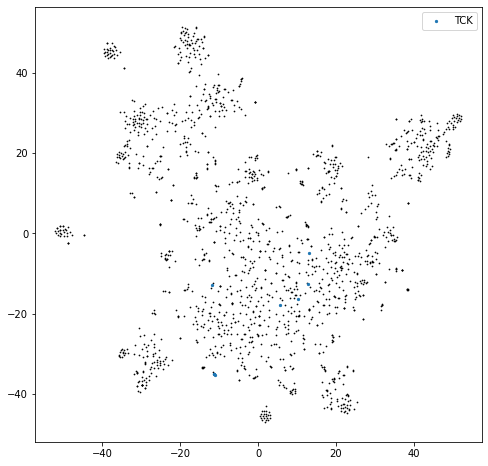

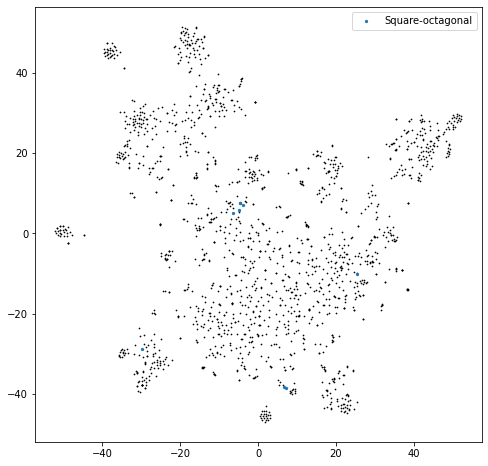

In [37]:
for code in code_to_names.keys():
    ax = plot_lattice_type(code)
    ax.legend()
    plt.show()